In [4]:
using LinearAlgebra
using Printf
using Polynomials
using Plots
using SparseArrays
using ToeplitzMatrices
using FiniteDifferences

global const µ = 3.986e14  # m^3/s^2

include("eval_f.jl")
include("forward_euler.jl")
include("trapezoidal.jl")

trapezoidal (generic function with 1 method)

### Make reduced order variables

In [40]:
function make_reduced_order(A, b, c, q)
    lambdas = eigvals(A);
    vectors = eigvecs(A);
    ass = size(A)
    
    Vq = zeros(ass[2], q);
#     n = size(vectors)
#     print(n)
    for i in 0:q-1
        print(q-i)
        Vq[:,i+1] = vectors[:,q-i]
    end    
    A_hat =  Vq' * A * Vq;
    b_hat = Vq' * b;
    c_hat = Vq' * c;
#     a = size(Vq)
    return A_hat, b_hat, c_hat, Vq
end

make_reduced_order (generic function with 1 method)

### transient reference function

In [20]:
function transient_ref(eval_f,x0,t_start,t_stop,n_time)

    ref_conf = zeros(length(n_time));
    (golden_x, golden_t) = euler(eval_f, t_start, t_stop, x0, n_time)

    X = Float64[];
#     time = time + dt;
    (temp, t_ref) = euler(eval_f, t_start, t_stop, x0, n_time)
    # add trapezoidal time integration here
    dims  = size(temp);
    print(dims[2])
#     print(temp[:,dims[2]])
    js dkfjsnf
    X = cat(X, temp[:,dims[2]], dims=(2,2));
    for n in -1:-.5:-4 
        dt  = 10^n;
        (temp, t_ref) = euler(eval_f, t_start, t_stop, x0, dt)
        # add trapezoidal time integration here
        dims  = size(temp2);
        X = cat(X, temp(dims[2]), dims=(2,2));
        r = max(abs(X[:,i] - X[:,i-1]))
        i = i+1;
        ref_conf[i-1] = r;
    end
    
    return X, ref_conf, t_ref
end

LoadError: syntax: "function" at In[20]:1 expected "end", got "dkfjsnf"

In [3]:
for n in -1:-.5:-4 
    print(n)


-1.0-1.5-2.0-2.5-3.0-3.5-4.0

### testing function with for Euler

In [7]:
function f(x)
    feval(x,0,0)
end

radius = 7e6  # m
velocity = sqrt(µ/radius)

x0 = [radius, 0, 0, 0, velocity, 0]
t0 = 0
ti = 2*pi*radius^1.5/µ^0.5  # Should result in 1 orbit
num_steps = 1000
xs = euler(f, t0, ti, x0, num_steps)

1001×6 Matrix{Float64}:
 7.0e6          0.0        0.0     0.0     7546.05  0.0
 7.0e6      43982.3        0.0   -47.4132  7546.05  0.0
 6.99972e6  87964.6        0.0   -94.8236  7545.75  0.0
 6.99917e6      1.31945e5  0.0  -142.229   7545.16  0.0
 6.99834e6      1.75922e5  0.0  -189.629   7544.26  0.0
 6.99724e6      2.19894e5  0.0  -237.019   7543.07  0.0
 6.99586e6      2.63859e5  0.0  -284.4     7541.58  0.0
 6.9942e6       3.07815e5  0.0  -331.768   7539.8   0.0
 6.99226e6      3.51761e5  0.0  -379.122   7537.71  0.0
 6.99005e6      3.95695e5  0.0  -426.461   7535.33  0.0
 6.98757e6      4.39615e5  0.0  -473.781   7532.65  0.0
 6.98481e6      4.83519e5  0.0  -521.082   7529.67  0.0
 6.98177e6      5.27406e5  0.0  -568.362   7526.4   0.0
 ⋮                                                  ⋮
 6.93992e6     -2.94087e6  0.0  2826.86    6684.98  0.0
 6.95639e6     -2.9019e6   0.0  2789.21    6700.94  0.0
 6.97265e6     -2.86285e6  0.0  2751.47    6716.68  0.0
 6.98869e6     -2.8237e6  

### trapezoidal method

In [46]:
radius = 7e6;  # m
velocity = sqrt(µ/radius);


x0 = [radius, 0, 0, 0, velocity, 0];
t0 = 0;
ti = 2*pi*radius^1.5/µ^0.5;  # Should result in 1 orbit
num_steps = 1000;
xs = trapezoidal(f, t0, ti, x0, num_steps)

1001×6 Matrix{Float64}:
 7.0e6            0.0        0.0     0.0       7546.05  0.0
 6.99986e6    43981.9        0.0   -47.4128    7545.9   0.0
 6.99945e6    87962.0        0.0   -94.8236    7545.45  0.0
 6.99876e6        1.31939e5  0.0  -142.231     7544.71  0.0
 6.99779e6        1.7591e5   0.0  -189.632     7543.67  0.0
 6.99655e6        2.19875e5  0.0  -237.026     7542.33  0.0
 6.99503e6        2.6383e5   0.0  -284.411     7540.69  0.0
 6.99323e6        3.07776e5  0.0  -331.784     7538.75  0.0
 6.99116e6        3.51709e5  0.0  -379.145     7536.52  0.0
 6.98881e6        3.95628e5  0.0  -426.49      7533.99  0.0
 6.98619e6        4.39532e5  0.0  -473.819     7531.16  0.0
 6.98329e6        4.83419e5  0.0  -521.129     7528.03  0.0
 6.98011e6        5.27286e5  0.0  -568.418     7524.61  0.0
 ⋮                                                      ⋮
 6.98328e6       -4.83563e5  0.0   521.284     7528.02  0.0
 6.98618e6       -4.39677e5  0.0   473.974     7531.15  0.0
 6.9888e6        -

Final energy / initial energy: 1.0000000000000027
-2.8471428571428496e7

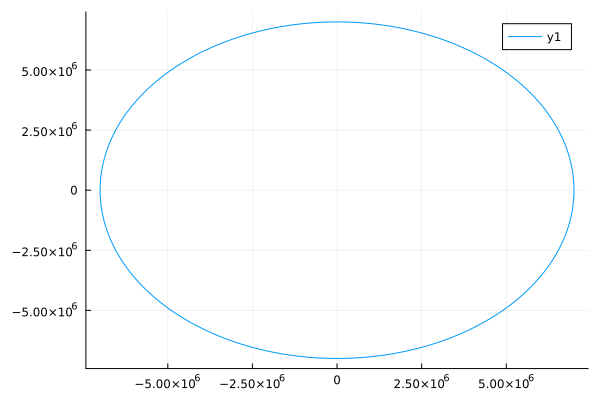

In [37]:
println("Final energy / initial energy: ",energy(x0)/energy(xs[num_steps+1,:]))
print(energy(xs[num_steps+1,:]))
plot(xs[:,1], xs[:,2])

# this is where I'm having trouble adding the reduced order to the current model function

In [51]:
num_steps = 6
N = 100
A = zeros(num_steps, num_steps)
A[num_steps,1] = -1; A[1,num_steps] = -1;
for i in 1:num_steps
    A[i,i] = 2
    if i < num_steps
        A[i,i+1] = -1
    end
    if i > 1
        A[i,i-1] = -1
    end
end
b = zeros(num_steps,1);
c = zeros(num_steps,1);
c[num_steps] = 1;

q = [5,10];
for i in 1:length(q)
    new_x0 = zeros(q[i]);
    if q[i] > length(x0)
        maxi = length(x0);
    else
        maxi = q[i];
    end
    for j in 1:maxi
        new_x0[j] = x0[j];
    end
    (A_hat, b_hat, c_hat, Vq) = make_reduced_order(A,b,c,q[i]);
    new_xs = A_hat * new_x0;
    print(new_xs)
    trapezoidal(f, t0, ti, new_x0, N)
    plot(xs[:,1], xs[:,2])
end

# plot(xs[:,1], xs[:,2])

54321[2.0999999999999996e7, 3.2872997817344296e-10, 6.414584987538432e-10, 7.9106219127808e-9, -1.0095554103513814e-9]

LoadError: DimensionMismatch: tried to assign 0 elements to 1 destinations